In [263]:
import pandas as pd
import matplotlib.pyplot as plt

In [264]:
def euler_method(x0: float, y0: float, k: float, t0: float, f: float) -> float:
    """Calculate the Euler's numerical appriximation function value of a function f
    for the given initial position (x0, y0) and step size k.

    Args:
        x0 (float): initial x position
        y0 (float): initial y position
        k (float): step size
        t0 (float): intial time
        f (function): function to approximate

    Returns:
        float: Euler's numerical approximation of the next function value f(x1)
    """
    x = x0 + k * f(x0, y0, t0)
    return x

def heun_method(x0: float, y0: float, k: float, t0: float, f: float) -> float:
    """Calculate the Heun's numerical appriximation function value of a function f
    for the given initial position (x0, y0) and step size k.

    Args:
        x0 (float): initial x position
        y0 (float): initial y position
        k (float): step size
        t0 (float): intial time
        f (function): function to approximate

    Returns:
        float: Heun's numerical approximation of the next function value f(x1)
    """
    x1_temp = euler_method(x0, y0, k, t0, f)
    y1_temp = euler_method(x0, y0, k, t0, f)
    x = x0 + k / 2 * (f(x0, y0, t0) + f(x1_temp, y1_temp, t0 + k))
    return x

In [277]:
# Starting from scratch
def acceleration(x1, y1, x2, y2, x3, y3):
    """Returns tuple of acceleration of an object with position (x1, y1) due to the gravitational force of two other objects with positions (x2, y2) and (x3, y3).

    Args:
        x1 (_type_): current object's x position
        y1 (_type_): 
        x2 (_type_): _description_
        y2 (_type_): _description_
        x3 (_type_): _description_
        y3 (_type_): _description_

    Returns:
        _type_: _description_
    """
    return - ((x1 - x2)/((x1-x2)**2+(y1-y2)**2)**(3/2)) - ((x1 - x3)/((x1-x3)**2+(y1-y3)**2)**(3/2)), - ((y1 - y2)/((x1-x2)**2+(y1-y2)**2)**(3/2)) - ((y1 - y3)/((x1-x3)**2+(y1-y3)**2)**(3/2))

def velocity(v0x, v0y, ax, ay, t):
    return (v0x + ax * t, v0y + ay * t)

def position(x0, y0, v0x, v0y, ax, ay, t):
    return (x0 + v0x * t + 1/2 * ax * t**2, y0 + v0y * t + 1/2 * ay * t**2)

def plot3Body(p1: tuple, p2: tuple, p3: tuple, v1: tuple, v2: tuple, v3: tuple, k: float, t: float, fignum: int = 1) -> tuple:
    """Returns a tuple of the position, velocity, and acceleration visualizations, along with the dataframe. 

    Args:
        p1 (tuple): x and y position of object 1
        p2 (tuple): x and y position of object 2
        p3 (tuple): x and y position of object 3
        v1 (tuple): vx and vy velocity of object 1
        v2 (tuple): vx and vy velocity of object 2
        v3 (tuple): vx and vy velocity of object 3
        k (float): step size
        t (float): end time

    Returns:
        tuple: (figure, dataframe)
    """
    df = pd.DataFrame(columns=['time', 'x1', 'y1', 'vx1', 'vy1', 'ax1', 'ay1', 'x2', 'y2', 'vx2', 'vy2', 'ax2', 'ay2', 'x3', 'y3', 'vx3', 'vy3', 'ax3', 'ay3'])
    
    x1 = p1[0]
    y1 = p1[1]
    x2 = p2[0]
    y2 = p2[1]
    x3 = p3[0]
    y3 = p3[1]
    vx1 = v1[0]
    vy1 = v1[1]
    vx2 = v2[0]
    vy2 = v2[1]
    vx3 = v3[0]
    vy3 = v3[1]
    for i in range(0, t):
        time = i * k
        ax1, ay1 = acceleration(x1, y1, x2, y2, x3, y3)
        ax2, ay2 = acceleration(x2, y2, x1, y1, x3, y3)
        ax3, ay3 = acceleration(x3, y3, x1, y1, x2, y2)
        vx1, vy1 = velocity(vx1, vy1, ax1, ay1, time)
        vx2, vy2 = velocity(vx2, vy2, ax2, ay2, time)
        vx3, vy3 = velocity(vx3, vy3, ax3, ay3, time)
        x1, y1 = position(x1, y1, vx1, vy1, ax1, ay1, time)
        x2, y2 = position(x2, y2, vx2, vy2, ax2, ay2, time)
        x3, y3 = position(x3, y3, vx3, vy3, ax3, ay3, time)
        data = [time, x1, y1, vx1, vy1, ax1, ay1, x2, y2, vx2, vy2, ax2, ay2, x3, y3, vx3, vy3, ax3, ay3]
        df2 = pd.DataFrame([data], columns=['time', 'x1', 'y1', 'vx1', 'vy1', 'ax1', 'ay1', 'x2', 'y2', 'vx2', 'vy2', 'ax2', 'ay2', 'x3', 'y3', 'vx3', 'vy3', 'ax3', 'ay3'])
        df = pd.concat([df, df2], ignore_index=True)

    plt.figure(fignum)
    plt.subplot(421)
    plt.title("y vs x")
    plt.scatter(df['x1'][0], df['y1'][0], c='blue', marker='x', label='Earth')
    plt.scatter(df['x2'][0], df['y2'][0], c='red', marker='x',label='Mars')
    plt.scatter(df['x3'][0], df['y3'][0], c='orange', marker='x', label='Venus')
    plt.scatter(df['x1'], df['y1'], c='blue', alpha=0.3, label='Earth')
    plt.scatter(df['x2'], df['y2'], c='red', alpha=0.3, label='Mars')
    plt.scatter(df['x3'], df['y3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.subplot(422)
    plt.plot(df['x1'][0], df['y1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['x2'][0], df['y2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['x3'][0], df['y3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['x1'], df['y1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['x2'], df['y2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['x3'], df['y3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('x')
    plt.ylabel('y')

    plt.subplot(423)
    plt.title('X Position')
    plt.plot(df['time'][0], df['x1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['x2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['x3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['x1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['x2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['x3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('x')

    plt.subplot(424)
    plt.title('Y Position')
    plt.plot(df['time'][0], df['y1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['y2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['y3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['y1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['y2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['y3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('y')

    plt.subplot(425)
    plt.title('X Velocity')
    plt.plot(df['time'][0], df['vx1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['vx2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['vx3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['vx1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['vx2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['vx3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('vx')
    
    plt.subplot(426)
    plt.title('Y Velocity')
    plt.plot(df['time'][0], df['vy1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['vy2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['vy3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['vy1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['vy2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['vy3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('vy')
    
    plt.subplot(427)
    plt.title('X Acceleration')
    plt.plot(df['time'][0], df['ax1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['ax2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['ax3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['ax1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['ax2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['ax3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('ax')
    
    plt.subplot(428)
    plt.title('Y Acceleration')
    plt.plot(df['time'][0], df['ay1'][0], c='blue', marker='x', label='Earth')
    plt.plot(df['time'][0], df['ay2'][0], c='red', marker='x',label='Mars')
    plt.plot(df['time'][0], df['ay3'][0], c='orange', marker='x', label='Venus')
    plt.plot(df['time'], df['ay1'], c='blue', alpha=0.3, label='Earth')
    plt.plot(df['time'], df['ay2'], c='red', alpha=0.3, label='Mars')
    plt.plot(df['time'], df['ay3'], c='orange', alpha=0.3, label='Venus')
    plt.xlabel('time')
    plt.ylabel('ay')

    plt.subplots_adjust(hspace=1.4, wspace=0.5)
    return (plt.figure(1), df)   

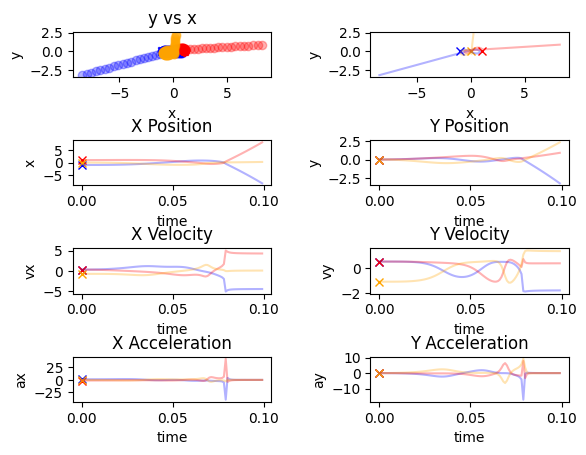

,time,x1,y1,vx1,vy1,ax1,ay1,x2,y2,vx2,vy2,ax2,ay2,x3,y3,vx3,vy3,ax3,ay3
0,0.000,-1.000000,0.000000,0.347113,0.532727,1.250000,-0.000000,1.000000,0.000000,0.347113,0.532727,-1.250000,-0.000000,0.000000,0.000000,-0.694226,-1.065454,0.000000,-0.000000
1,0.001,-0.999651,0.000533,0.348363,0.532727,1.250000,-0.000000,1.000345,0.000533,0.345863,0.532727,-1.250000,-0.000000,-0.000694,-0.001065,-0.694226,-1.065454,0.000000,-0.000000
2,0.002,-0.998947,0.001598,0.350867,0.532724,1.252087,-0.001603,1.001029,0.001598,0.343367,0.532724,-1.247921,-0.001593,-0.002083,-0.003196,-0.694234,-1.065448,-0.004165,0.003196
3,0.003,-0.997877,0.003196,0.354636,0.532709,1.256273,-0.004840,1.002043,0.003196,0.339636,0.532710,-1.243776,-0.004750,-0.004166,-0.006393,-0.694272,-1.065419,-0.012496,0.009590
4,0.004,-0.996428,0.005327,0.359686,0.532670,1.262575,-0.009771,1.003372,0.005327,0.334685,0.532672,-1.237583,-0.009411,-0.006943,-0.010654,-0.694372,-1.065342,-0.024992,0.019182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.095,-6.753168,-2.524688,-4.438305,-1.760442,0.020438,0.010398,6.558891,0.744637,4.329658,0.393957,-0.032974,0.002840,0.194276,1.780050,0.108647,1.366484,0.012537,-0.013238
96,0.096,-7.178998,-2.693564,-4.436587,-1.759563,0.017894,0.009154,6.974139,0.782493,4.326883,0.394206,-0.028906,0.002592,0.204859,1.911070,0.109704,1.365357,0.011012,-0.011747
97,0.097,-7.609124,-2.864127,-4.435057,-1.758776,0.015778,0.008111,7.393487,0.820765,4.324408,0.394436,-0.025516,0.002369,0.215638,2.043362,0.110648,1.364340,0.009738,-0.010480
98,0.098,-8.043558,-3.036383,-4.433685,-1.758068,0.014000,0.007228,7.816952,0.859451,4.322187,0.394648,-0.022664,0.002168,0.226606,2.176932,0.111497,1.363419,0.008664,-0.009395


In [280]:
p, df = plot3Body((-1, 0), (1, 0), (0, 0), (0.347113, 0.532727), (0.347113, 0.532727), (-0.694226, -1.065454), 0.001, 100)
# q, df2 = plot3Body((-1, 0), (1, 0), (0, 0), (0.405043, 0.492281), (0.405043, 0.492281), (-0.810086, -0.984562), 0.001, 80, 2)
plt.show()
df